In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [26]:
df = pd.read_csv('train_dataset_train.csv', sep=',')
df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [27]:
df.shape

(1091021, 12)

In [28]:
df.columns

Index(['id', 'ticket_id', 'ticket_type_nm', 'entrance_id', 'entrance_nm',
       'station_id', 'station_nm', 'line_id', 'line_nm', 'pass_dttm',
       'time_to_under', 'label'],
      dtype='object')

In [29]:
cols = df.columns
for col in cols:
    print(f"Характеристика: {col}")
    print(f"Количество уникальных значений: {df[col].nunique()}")
    print(f"Список значений: {df[col].value_counts()}")
    print(f"Список значений: {df[col].value_counts(normalize=True)}")
    print('///////////////////////////////////////////////////')

Характеристика: id
Количество уникальных значений: 1091021
Список значений: 2049       1
800556     1
894750     1
896799     1
808736     1
          ..
1088326    1
1086279    1
1059664    1
1057617    1
2047       1
Name: id, Length: 1091021, dtype: int64
Список значений: 2049       9.165726e-07
800556     9.165726e-07
894750     9.165726e-07
896799     9.165726e-07
808736     9.165726e-07
               ...     
1088326    9.165726e-07
1086279    9.165726e-07
1059664    9.165726e-07
1057617    9.165726e-07
2047       9.165726e-07
Name: id, Length: 1091021, dtype: float64
///////////////////////////////////////////////////
Характеристика: ticket_id
Количество уникальных значений: 335533
Список значений: 7992E92F9AE0F7506BD439547FD7E11F    8
15A93BB90FA63B7D1910B4C72EEA8AC6    8
5E80A67C732C384DAABDA4603EEA0933    7
B74133D9205CBBF60E156273BCF0B2E4    7
25AB15322537B5E9CBB79751D8086363    7
                                   ..
BF373B99BE443FF23CC0C6E3BCB0CB26    1
FFAE9B9F39F4DBB9D3

Количество уникальных значений: 426
Список значений: Щёлковская ( Северный )        17810
Кузьминки (Восточный)          13530
Некрасовка (Первый)            12205
Славянский бульвар (Восток)    11963
Новогиреево (Восточный)        11949
                               ...  
ВВЦ                               16
Ул. Эйзенштейна                   10
Ул. Ак. Королёва                   9
Телецентр                          8
Мнёвники (Второй)                  4
Name: entrance_nm, Length: 426, dtype: int64
Список значений: Щёлковская ( Северный )        0.016324
Кузьминки (Восточный)          0.012401
Некрасовка (Первый)            0.011187
Славянский бульвар (Восток)    0.010965
Новогиреево (Восточный)        0.010952
                                 ...   
ВВЦ                            0.000015
Ул. Эйзенштейна                0.000009
Ул. Ак. Королёва               0.000008
Телецентр                      0.000007
Мнёвники (Второй)              0.000004
Name: entrance_nm, Length: 426, dtype:

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091021 entries, 0 to 1091020
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   id              1091021 non-null  int64  
 1   ticket_id       1091021 non-null  object 
 2   ticket_type_nm  1091021 non-null  object 
 3   entrance_id     1091021 non-null  int64  
 4   entrance_nm     1091021 non-null  object 
 5   station_id      1091021 non-null  int64  
 6   station_nm      1091021 non-null  object 
 7   line_id         1091021 non-null  int64  
 8   line_nm         1091021 non-null  object 
 9   pass_dttm       1091021 non-null  object 
 10  time_to_under   1091021 non-null  float64
 11  label           1091021 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 99.9+ MB


In [31]:
df["pass_dttm"].astype('datetime64')

0         2022-09-12 05:00:13
1         2022-09-12 05:00:54
2         2022-09-12 05:00:55
3         2022-09-12 05:01:13
4         2022-09-12 05:02:55
                  ...        
1091016   2022-09-19 02:54:50
1091017   2022-09-19 03:06:02
1091018   2022-09-19 03:17:00
1091019   2022-09-19 03:23:30
1091020   2022-09-19 04:10:42
Name: pass_dttm, Length: 1091021, dtype: datetime64[ns]

In [32]:
df["pass_dttm"] = pd.to_datetime(df["pass_dttm"])
df_hour = df["pass_dttm"].dt.hour
df_hour = df_hour.value_counts()

In [33]:
df_hour = df_hour.reset_index().rename(columns = {'index': 'hour', 'pass_dttm': 'number of people'})

In [34]:
df_hour

,hour,number of people
0,8,232006
1,7,208545
2,9,141080
3,6,116616
4,10,77730
5,11,54940
6,12,42521
7,13,38645
8,14,32010
9,15,28072


<AxesSubplot:xlabel='hour', ylabel='number of people'>

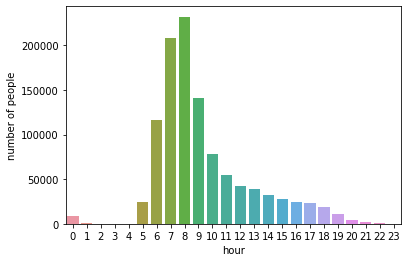

In [36]:
sns.barplot(x = df_hour["hour"], y = df_hour["number of people"])

In [49]:
df_line = df['line_id']
df_line = df_line.value_counts()
df_line = df_line.reset_index().rename(columns = {'index': 'line', 'line_id': 'number of people'})

<AxesSubplot:xlabel='line', ylabel='number of people'>

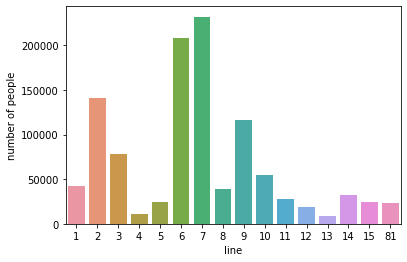

In [51]:
sns.barplot(x = df_line["line"], y = df_hour["number of people"])

In [55]:
df_time_type = df[['ticket_type_nm', 'time_to_under']]

,ticket_type_nm,time_to_under
0,Пропуск FacePay,216.316667
1,СК учащегося 30 дней,648.183333
2,БСК дружинника г.Москвы,865.333333
3,30 дней,1048.233333
4,КОШЕЛЕК,965.600000
...,...,...
1091016,Пропуск FacePay,124.750000
1091017,Пропуск FacePay,56.066667
1091018,Пропуск FacePay,91.283333
1091019,Пропуск FacePay,47.900000


In [61]:
df_time_type = df[['ticket_type_nm', 'time_to_under']].groupby('ticket_type_nm')['time_to_under'].mean()
df_time_type = df_time_type.reset_index()
df_time_type.head()

,ticket_type_nm,time_to_under
0,1 сутки ЕДИНЫЙ ТК,284.357046
1,1 сутки Пригород ТК,584.609524
2,3 суток Единый ТК,294.389649
3,30 дней,550.641407
4,30 дней Пригород,509.703120


<AxesSubplot:xlabel='ticket_type_nm', ylabel='time_to_under'>

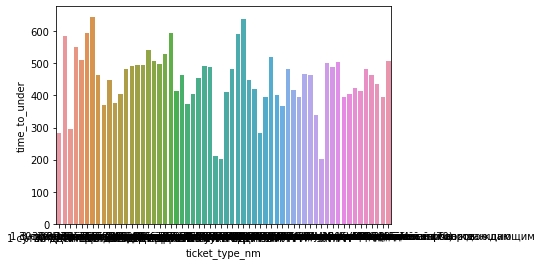

In [63]:
sns.barplot(x = df_time_type["ticket_type_nm"], y = df_time_type["time_to_under"], ax =None)